# Classification

## Machine Learning with scikit-learn

In [1]:
path = r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\telecom_churn_clean.csv'

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
churn_df = pd.read_csv(path)
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values #.values exports the data as Numpy Array
y = churn_df['churn'].values

In [9]:
print(X.shape, y.shape)

(3333, 2) (3333,)


In [10]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=15)

In [11]:
X_new = np.array(
  [ [56.8, 17.5]
   ,[24.4, 24.1]
   ,[50.1, 10.9]]
)
print(X_new.shape)

(3, 2)


In [12]:
predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

Predictions: [1 0 0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
y = churn_df['churn'].values
X = churn_df[['account_length', 'customer_service_calls']].values
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

In [14]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
predictions = knn.predict(X_new)
print(f'Predictions: {predictions}')

Predictions: [0 1 0]


In [15]:
def upper_everything(elements: list[str]) -> list[str]:
  return [element.upper() for element in elements]

In [16]:
lst = ['apple', 'banana', 'kiwi']
upper_everything(lst)

['APPLE', 'BANANA', 'KIWI']

In [17]:
sample: list[int] = ['a', 1, 'b', 2]

## Measuring Model Performance

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\1270816\AppData\Local\Temp\ipykernel_21056\554600982.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
path = r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\telecom_churn_clean.csv'

In [4]:
churn_df = pd.read_csv(path)
X = churn_df.drop('churn', axis=1).values
y = churn_df['churn'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8545727136431784


In [6]:
# Finding Accuracies
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train,y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors,'\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


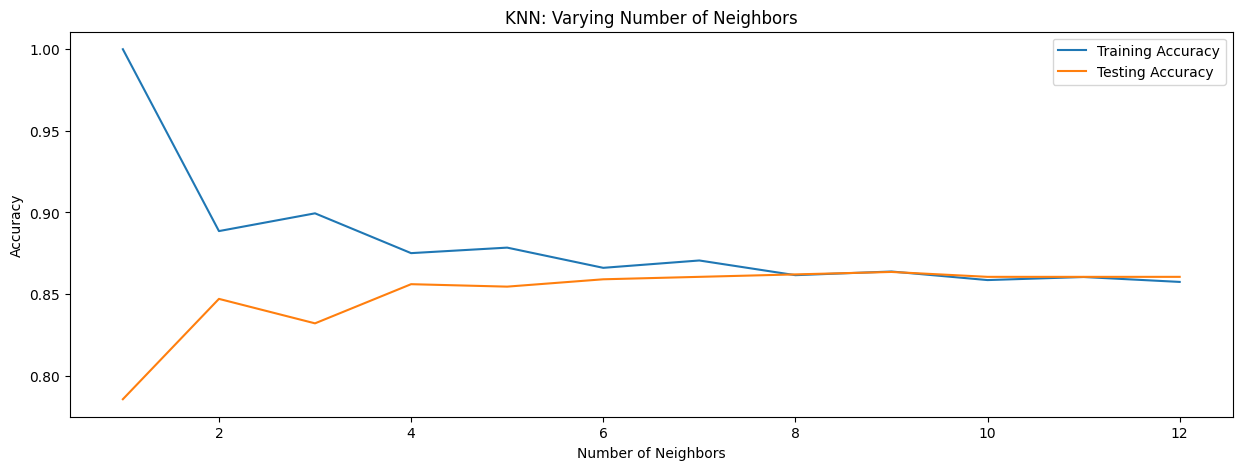

In [14]:
#Plotting accuracies
plt.figure(figsize=(15,5))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(train_accuracies.keys(), train_accuracies.values(), label='Training Accuracy')
plt.plot(test_accuracies.keys(), test_accuracies.values(), label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Regression

## Introduction to Regression

In [16]:
path = r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\diabetes_clean.csv'

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [18]:
diabetes_df = pd.read_csv(path)
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### Predict Blood Glucose Levels using single feature BMI

In [28]:
X_bmi = diabetes_df.loc[:, 'bmi'].values
# X_bmi = X[:, 3]
print(type(X_bmi))

<class 'numpy.ndarray'>


In [27]:
X_bmi = X[:, 3]
print(type(X_bmi))

<class 'numpy.ndarray'>


In [30]:
print(y.shape, X_bmi.shape)

(768,) (768,)


In [35]:
# We need to convery it into a two dimensional array to be accepted by scikit
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


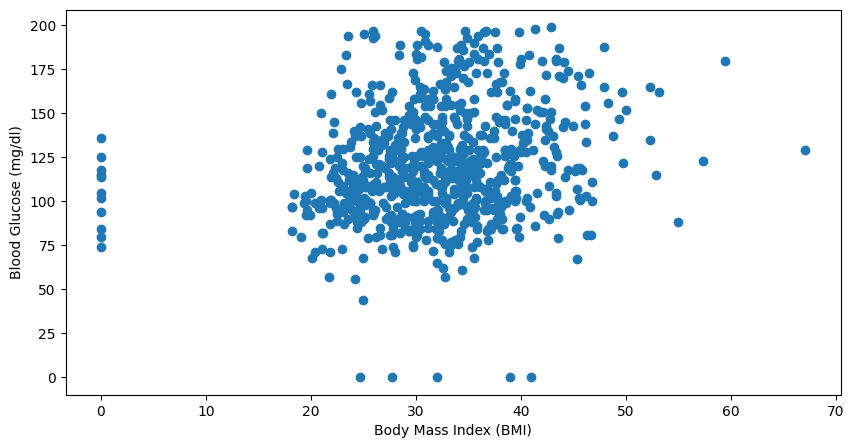

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(X_bmi, y)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index (BMI)')
plt.show();

#### Fitting Linear Regression Model

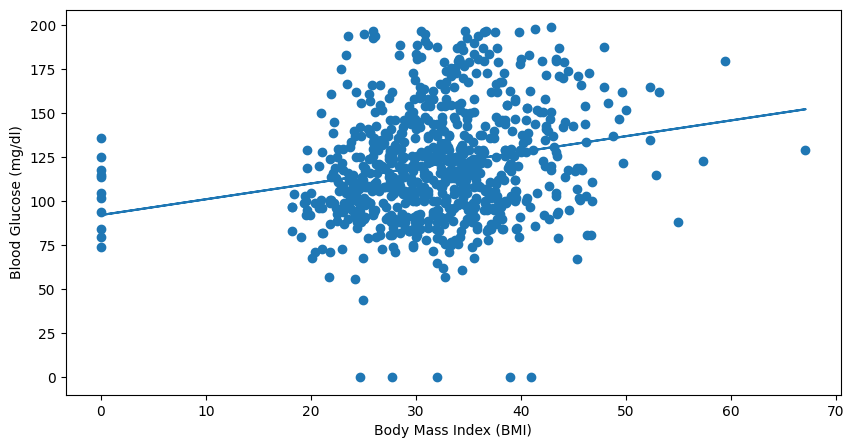

In [41]:
lr = LinearRegression()
lr.fit(X_bmi, y)
predictions = lr.predict(X_bmi)
plt.figure(figsize=(10,5))
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index (BMI)')
plt.show();

In [43]:
# =acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371
sales_df = pd.read_csv(r'C:\Users\1270816\Documents\EDG\Python\Python\Machine Learning\Datasets\advertising_and_sales_clean.csv')
print(sales_df)

           tv     radio  social_media influencer      sales
0     16000.0   6566.23       2907.98       Mega   54732.76
1     13000.0   9237.76       2409.57       Mega   46677.90
2     41000.0  15886.45       2913.41       Mega  150177.83
3     83000.0  30020.03       6922.30       Mega  298246.34
4     15000.0   8437.41       1406.00      Micro   56594.18
...       ...       ...           ...        ...        ...
4541  26000.0   4472.36        717.09      Micro   94685.87
4542  71000.0  20610.69       6545.57       Nano  249101.92
4543  44000.0  19800.07       5096.19      Micro  163631.46
4544  71000.0  17534.64       1940.87      Macro  253610.41
4545  42000.0  15966.69       5046.55      Micro  148202.41

[4546 rows x 5 columns]


In [44]:
X = sales_df['radio'].values
y = sales_df['sales'].values
X = X.reshape(-1, 1)
print(X.shape, y.shape)

(4546, 1) (4546,)


In [45]:
lr = LinearRegression()
lr.fit(X, y)
predictions = lr.predict(X)
print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


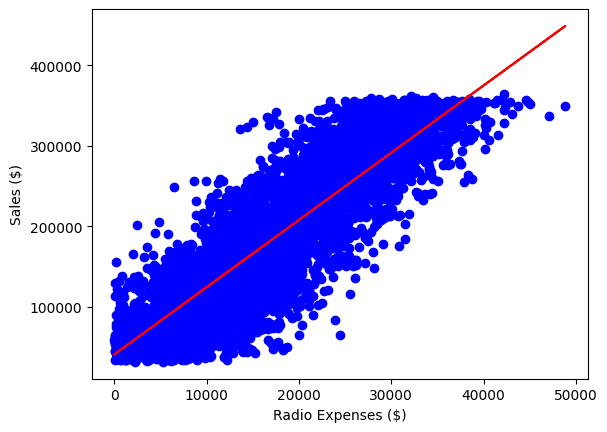

In [46]:
plt.scatter(X, y, color='blue')
plt.plot(X, predictions, color='red')
plt.xlabel('Radio Expenses ($)')
plt.ylabel('Sales ($)')
plt.show();

In [ ]:
log= {}
import datetime as dt

In [ ]:
def create_function_log(func):
    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        log[func.__name__+'-'+str(dt.datetime.utcnow())] = f'Running {func.__name__} ==> returned {result}'
        return result
    return wrapper

In [ ]:
def add(x, y):
    return x + y

print(add(5,7))

12


In [ ]:
@create_function_log
def add(x, y):
    return x + y

print(add(5,7))

12


In [ ]:
print(add(50, 7))

57


In [ ]:
log

{'add-2024-02-23 02:29:26.769661': 'Running add ==> returned 12',
 'add-2024-02-23 02:29:33.112001': 'Running add ==> returned 57'}